### GAN evaluation để đánh giá chất lượng ảnh GAN sinh ra chất lượng tốt hay không. Có 2 chỉ số hay gặp :
* Inception Score (IS)
* Fréchet Inception Distance (FID)

### Để đánh giá ảnh sinh ra cần dựa trên 2 yếu tố:
* Chất lượng ảnh: muốn chất lượng ảnh cao, giống với dataset
* Độ đa dạng: Generator cần sinh ra được nhiều ảnh khác nhau khi mình random input z. Nếu Generator mãi chỉ sinh ra được một vài ảnh thì cũng không thực sự ý nghĩa lắm

# 1. Inception Score (IS)
## 1.1. Inception Score (IS)
* Inception là mạng CNN về nhì trong cuộc thi ImageNetChallange 2015, đc tính bằng cách sử dụng pre-trained model Inception trên dữ liệu ImageNet:
    * Input là 1 ảnh, output vs hàm softmax cho ra xác suất thuộc mỗi lớp
    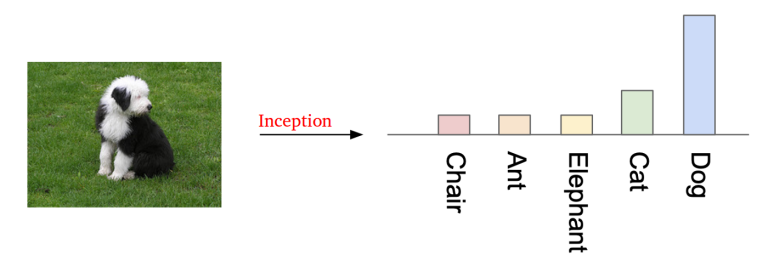
    * Tuy nhiên nếu ảnh ko thuộc lớp nào thì xác suất mỗi lớp khá giống nhau (uniform)
    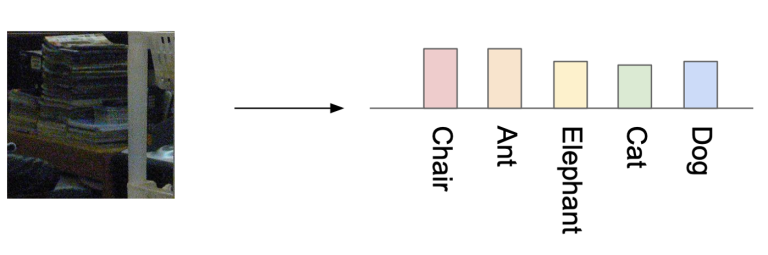
* Lợi dụng điều đó, ta cho ảnh sinh ra bởi Generator đi qua Inception:
    * Nếu ảnh rõ thì mạng Inception sẽ phân loại tốt (xác suất 1 lớp sẽ cao hẳn) $\Rightarrow$ Kiểm tra đc chất lượng ảnh
    * Ta cộng các xác suất của các ảnh sinh ra bởi Generator lại vs nhau, nếu tổng xác suất đó ở dạng uniform thì ta thấy xác suất của các lớp đc sinh ra là bằng nhau $\Rightarrow$ Kiểm tra đc độ đa dạng ảnh
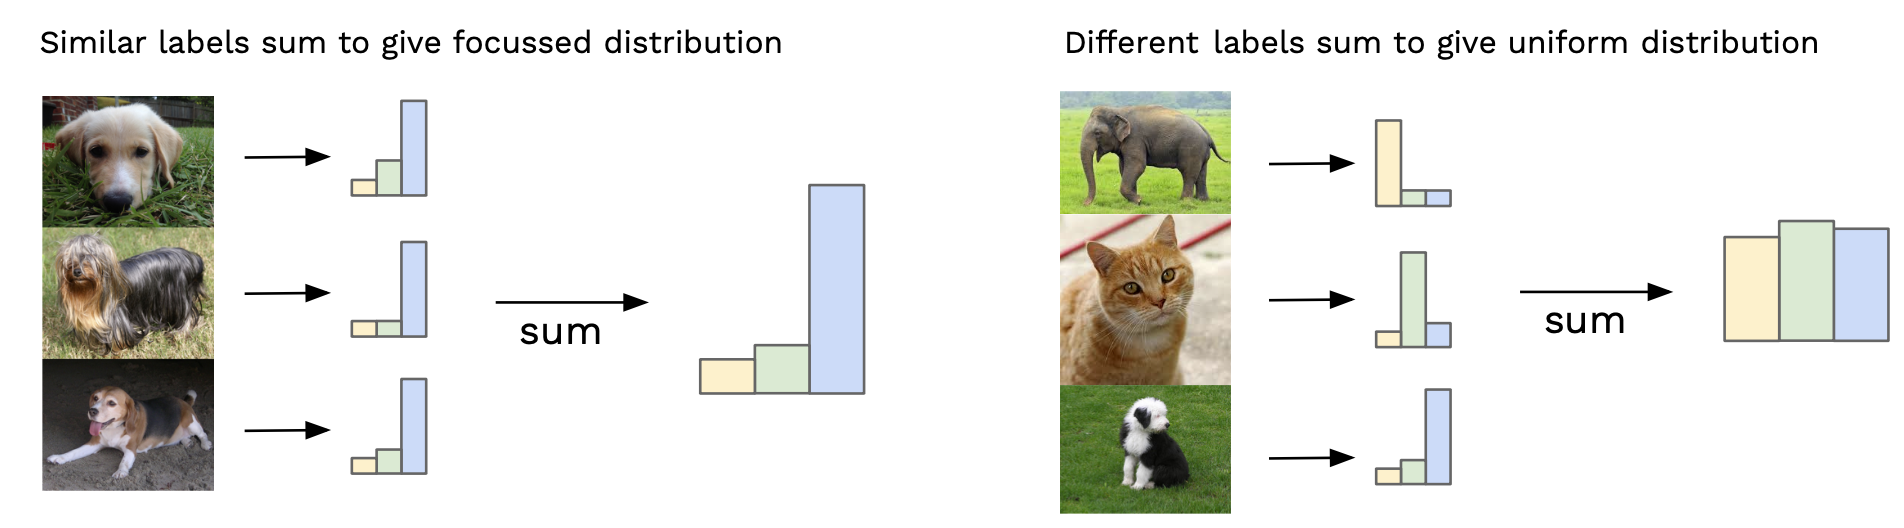
* Như vậy ta có thể đánh giá ảnh sinh ra Generator:
    * Chất lượng ảnh: qua xác suất của 1 ảnh
    * Độ đa dạng ảnh: qua tổng xác suất của tất cả các ảnh
* Ta sẽ sử dụng **Kullback-Leibler divergence (KLD)** để đánh giá (so sánh 2 distribution và trả về mức độ tương đồng 2 phân phối)
    > $\large{\displaystyle D_{KL}(P\mid\mid Q)~=\int{P(x)\log\frac{P(x)}{Q(x)}dx}}$
    * $x$ là ảnh đầu vào, $y$ là label các lớp tương ứng
    * Giá trị của 1 ảnh qua mạng Inception là **label distribution** ($p(y\mid x)$)
    * Giá trị đã normalize tổng tất cả **label distribution** của các ảnh là **marginal distribution**
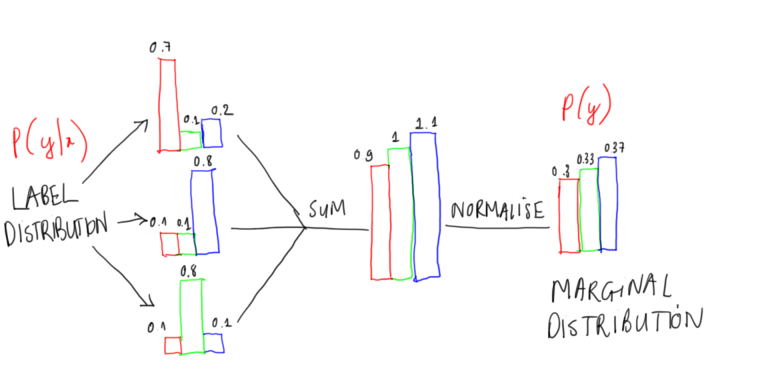
* Để mô hình sinh ra ảnh tốt, ta cần
    * Chất lượng ảnh tốt: cần **label distribution** cao ở 1 lớp, thấp ở các lớp còn lại
    * Đa dạng các loại ảnh: cần **marginal distribution** ở dạng uniform
* Một số trường hợp:
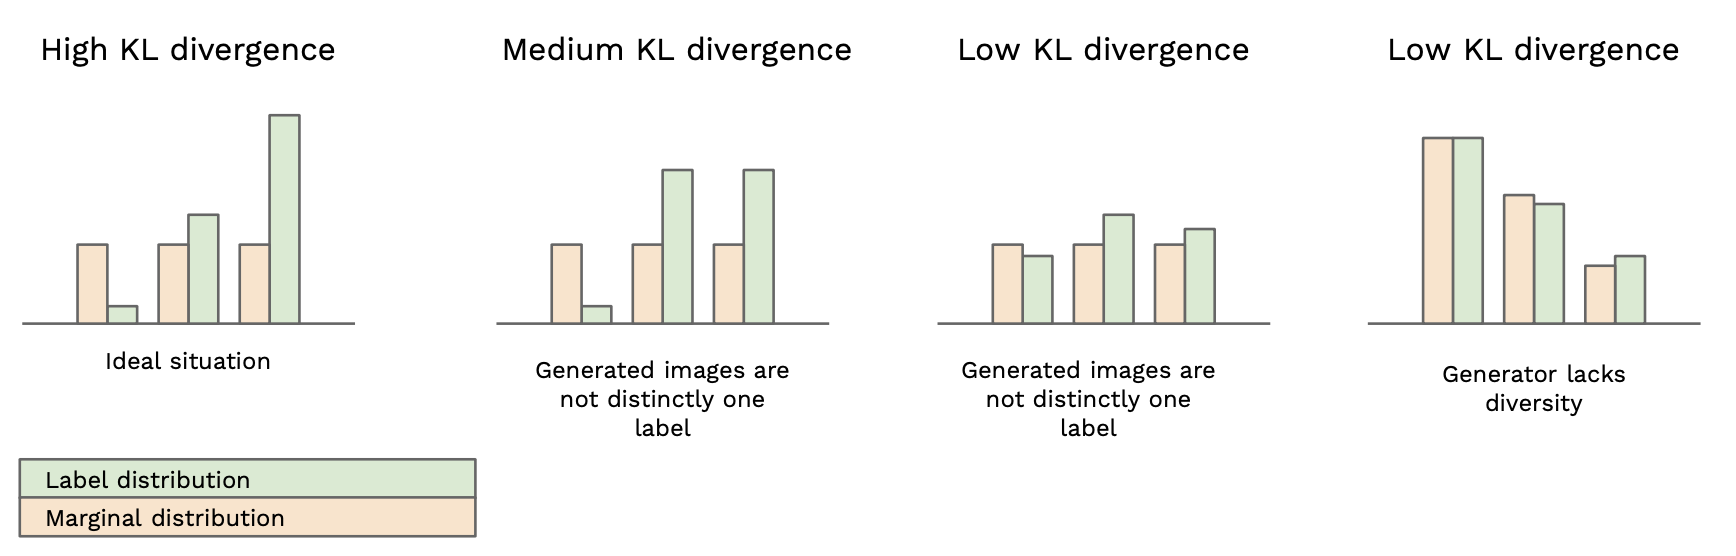
* Ta sẽ cần giá trị KL cao (chất lượng ảnh cao và đa dạng các ảnh), ta có thể tính gtrị KL cho mỗi ảnh sinh ra rồi lấy trung bình lại làm gtrị IS (Inception score) cho model
    > $\large{\displaystyle IS(G)=\exp(\mathbb{E}_{x\in p_g(x)}D_{KL}(p(y)\mid\mid p(y\mid x)))}\quad\quad$ Trong đó:
    
    > $p(y\mid x)$ là **label distribution** $\\$
    $p(y)$ là **marginal distribution**

## 1.2. Hạn chế
* Vì dùng Inception pre-trained model vs Imagenet dataset, nên nếu Generator sinh ra ảnh ko thuộc lớp trong Imagenet thì gtrị output của model ko ý nghĩa lắm $\Rightarrow$ KL thấp
* Nếu Generator chỉ sinh được 1 ảnh mỗi lớp thì chỉ số KL vẫn có thể cao $\Rightarrow$ Chỉ đa dạng lớp nhưng không đa dạng ảnh trong mỗi lớp
* Nếu Generator nhớ và sinh ra các ảnh trong dataset thì chỉ số KL cũng cao $\Rightarrow$ Không tốt

# 2. Fréchet Inception Distance (FID)
## 2.1. Distribution cho 1 dataset
* Vs dataset dạng 2D, yêu cầu tìm gaussian distribution để fit dữ liệu nhất, ta tìm đc **normal distribution** (mean = 0, std = 1)
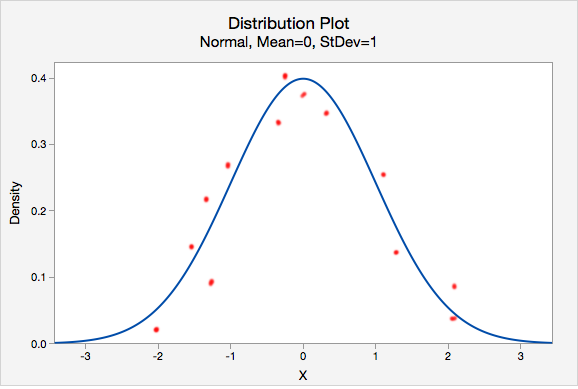
* Tương tự vs dataset dạng 3D thì tìm đc 2D **multivariate gaussian distribution**
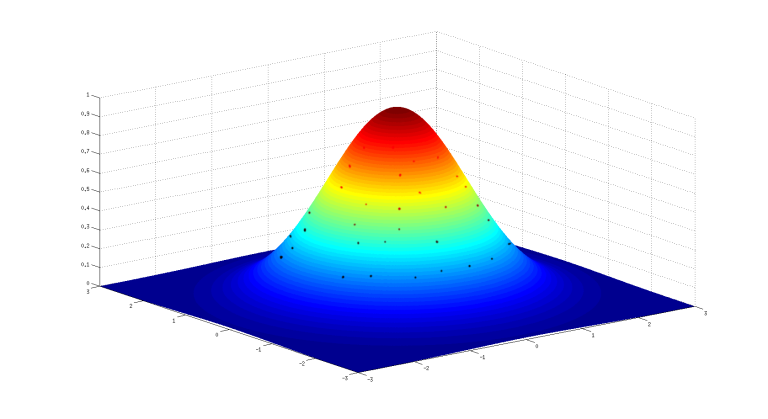
* Vậy vs n điểm dữ liệu m chiều thì tìm đc một (m - 1)D **multivariate gaussian distribution** fit nhất

## 2.2. FID
* Cách tính FID phụ thuộc vào Inception network
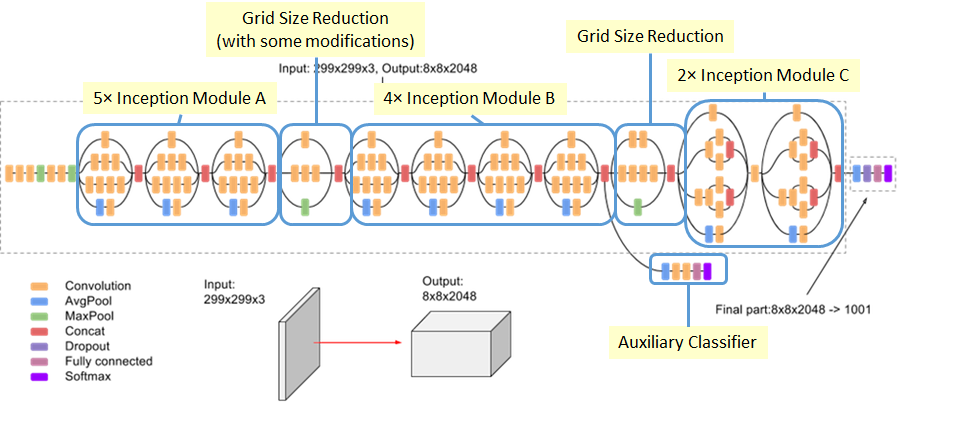
* Khi ta giữ đến lớp AvgPool còn bỏ phần sau của mạng thì mỗi ảnh qua mạng sẽ output ra vector kích thước (2048,) chứa các đặc trưng của ảnh
* Lúc này ta sẽ tìm 2 **multivariate gaussian distribution**:
    * Các ảnh trong dataset, mỗi ảnh đi qua Inception netwwork sẽ đc 1 vector (2048,), ta sẽ tìm đc 1 **multivariate gaussian distribution** fit vs tất cả vector này vs mean = $\mu_x$, std = $\sum_x$
    * Các ảnh sinh ra bởi Generator, mỗi ảnh đi qua Inception netwwork sẽ đc 1 vector (2048,), ta sẽ tìm đc 1 **multivariate gaussian distribution** fit vs tất cả vector này vs mean = $\mu_g$, std = $\sum_g$
* Để Generator sinh ra các ảnh giống các ảnh trong dataset thì mong muốn 2 **multivariate gaussian distribution** giống nhau (mean và variance gần nhau):
> $\large{FID=~\|\mu_x-\mu_g\|^2_2+\text{trace}(\sum_x+\sum_g-2(\sum_x\sum_g)^{\frac{1}{2}})}$
* FID ko âm và FID càng thấp thì 2 distribution càng gần nhau $\Rightarrow$ Ảnh sinh ra càng giống ảnh gốc trong dataset

### Tóm lại IS đánh giá dựa trên xác suất của ảnh, còn FID dựa trên đặc trưng của ảnh
### $\Rightarrow$ Đều đánh giá chất lượng ảnh sinh ra bởi GAN